### Dataset

1. Ind_ID: ID klien, digunakan untuk mengidentifikasi pemohon secara unik.
2. Gender: Jenis kelamin pemohon.
4. Car_owner: Menunjukkan apakah pemohon memiliki mobil atau tidak.
5. Propert_owner: Menunjukkan apakah pemohon memiliki properti atau tidak.
6. Children: Jumlah anak yang dimiliki oleh pemohon.
7. Annual_income: Penghasilan tahunan pemohon.
8. Type_Income: Jenis penghasilan (misalnya, gaji tetap, pekerjaan lepas, dll.).
9. Education: Tingkat pendidikan yang dimiliki pemohon (misalnya, SMA, Sarjana, Pasca Sarjana).
10. Marital_status: Status pernikahan pemohon (misalnya, menikah, lajang, dll.).
11. Housing_type: Tipe tempat tinggal (misalnya, rumah sewa, rumah sendiri).
12. Family_Members: Ukuran keluarga pemohon.
13. Label: Status keputusan pengajuan kartu kredit. Nilai 0 menunjukkan aplikasi disetujui, sementara nilai 1 menunjukkan aplikasi ditolak.

## Outline Pengerjaan

### 1. Read Data

In [ ]:
import pandas as pd
df = pd.read_csv('dataset.csv')

Melihat **ringkasan statistik**  data

In [2]:
df.describe()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,label
count,1.541000e+03,1541.000000,1541.000000,1541.000000,1541.000000,1.541000e+03,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000
mean,5.078979e+06,0.368592,0.401687,0.653472,0.413368,1.907968e+05,1.870214,3.073329,1.435432,1.288774,2.162232,0.110318
std,4.167137e+04,0.482580,0.490398,0.476018,0.777811,1.121136e+05,1.272089,1.346162,0.981261,0.959740,0.948492,0.313387
min,5.008827e+06,0.000000,0.000000,0.000000,0.000000,3.375000e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045113e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
50%,5.078924e+06,0.000000,0.000000,1.000000,0.000000,1.710000e+05,3.000000,4.000000,1.000000,1.000000,2.000000,0.000000
75%,5.115671e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,3.000000,4.000000,2.000000,1.000000,3.000000,0.000000
max,5.150412e+06,1.000000,1.000000,1.000000,14.000000,1.575000e+06,3.000000,4.000000,4.000000,5.000000,15.000000,1.000000


### 2. Pre-Modelling

#### Data Balancing

Mengecek distribusi data dari variable Target

In [3]:
df['label'].value_counts()

label
0    1371
1     170
Name: count, dtype: int64

Random UnderSampling

Memisahkan kelas mayoritas dan minoritas

In [4]:
majority = df[df["label"] == 0]
minority = df[df['label'] == 1]

Melakukan Random Undersampling

In [5]:
majority_undersampled = majority.sample(n=len(minority), random_state=42)

Mengabungkan kembali kelas mayoritas yang sudah di-undersample dengan kelas minoritas

In [6]:
df_balanced = pd.concat([majority_undersampled, minority])

Cek distribusi kelas target setelah balancing

In [7]:
print("Distribusi Kelas target setelah balancing:\n",df_balanced['label'].value_counts())

Distribusi Kelas target setelah balancing:
 label
0    170
1    170
Name: count, dtype: int64


#### Split Dataset

In [8]:
from sklearn.model_selection import train_test_split

In [59]:
X = df_balanced.drop(columns=['label','Ind_ID'])
y = df_balanced['label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Cek distribusi kelas target pada data latih dan tes

In [11]:
print ("Distribusi kelas pada Data Latih:\n", y_train.value_counts())
print ("Distribusi kelas pada Data Uji:\n", y_test.value_counts())

Distribusi kelas pada Data Latih:
 label
1    122
0    116
Name: count, dtype: int64
Distribusi kelas pada Data Uji:
 label
0    54
1    48
Name: count, dtype: int64


### 3. Build Model

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
y_pred = model.predict(X_test)

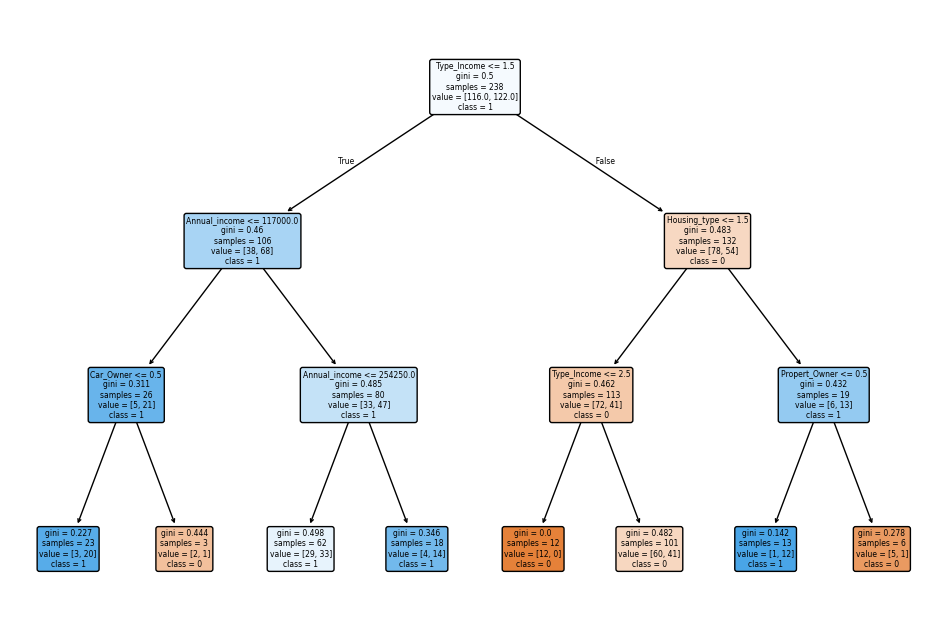

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(12,8))
tree.plot_tree(model,
               feature_names=X.columns,
               class_names=['0','1'],
               filled=True,
               rounded=True)
plt.show()

### 4. Evaluate the model (before tuning)

In [16]:
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
print ("Akurasi : ", accuracy_score(y_test, y_pred))

Akurasi :  0.5686274509803921


In [18]:
print ("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[34 20]
 [24 24]]


In [19]:
print ("Klasifikasi :\n", classification_report(y_test, y_pred))

Klasifikasi :
               precision    recall  f1-score   support

           0       0.59      0.63      0.61        54
           1       0.55      0.50      0.52        48

    accuracy                           0.57       102
   macro avg       0.57      0.56      0.56       102
weighted avg       0.57      0.57      0.57       102



In [20]:
X_train_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit(disp=0)

In [21]:
print("p-value: ",result.pvalues)

p-value:  const             0.413935
GENDER            0.003693
Car_Owner         0.196187
Propert_Owner     0.807777
CHILDREN          0.255982
Annual_income     0.399401
Type_Income       0.001663
EDUCATION         0.839472
Marital_status    0.076515
Housing_type      0.899276
Family_Members    0.242521
dtype: float64


In [22]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [23]:
y_proba = model.predict_proba(X_test)[:,1]

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

In [25]:
roc_auc = auc(fpr, tpr)
print (f"AUC: {roc_auc}")

AUC: 0.5636574074074074


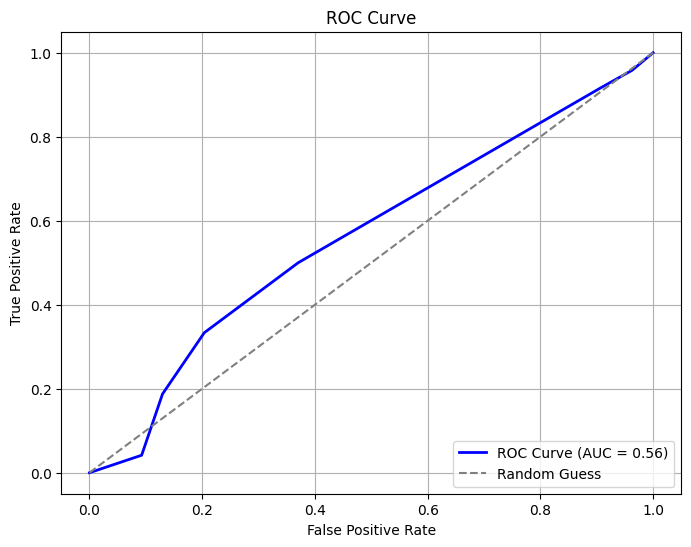

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], color='gray', linestyle='--', label = "Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc = "lower right")
plt.grid()
plt.show()

### 5. Model Tuning 1


In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,5,10,15,20],
    'min_samples_split' : [2,5,10,20],
    'min_samples_leaf' : [1,2,5,10],
    'max_features' : [None, 'sqrt', 'log2']
}

In [29]:
dt_model = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid)

In [30]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]})

### 6. Evaluate the model (after tuning 1)

In [31]:
print ("Best Parameter: ",grid_search.best_params_)
print ("Best Score: ",grid_search.best_score_)

Best Parameter:  {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score:  0.6384751773049646


In [32]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)    

In [33]:
print ("Akurasi : ", accuracy_score(y_test,y_pred))

Akurasi :  0.5784313725490197


In [34]:
print ("Confusuion Matrix:\n", confusion_matrix(y_test,y_pred))

Confusuion Matrix:
 [[32 22]
 [21 27]]


In [35]:
print ("Klasifikasi: \n", classification_report(y_test,y_pred))

Klasifikasi: 
               precision    recall  f1-score   support

           0       0.60      0.59      0.60        54
           1       0.55      0.56      0.56        48

    accuracy                           0.58       102
   macro avg       0.58      0.58      0.58       102
weighted avg       0.58      0.58      0.58       102



In [36]:
y_proba = model.predict_proba (X_test)[:, 1]

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

In [38]:
roc_auc = auc (fpr, tpr)
print (f"AUC: {roc_auc}")

AUC: 0.5636574074074074


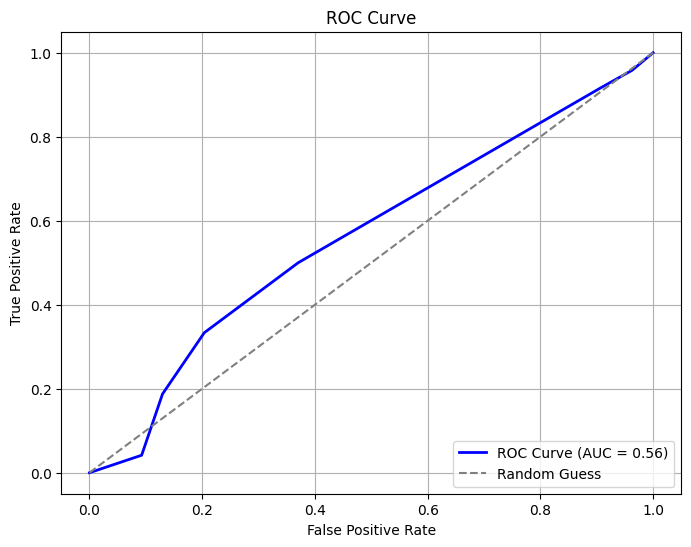

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], color='gray', linestyle='--', label = "Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc = "lower right")
plt.grid()
plt.show()

### 7. Model Tuning 2


In [40]:
feature = ['Type_Income', 'EDUCATION', 'Housing_type']

In [41]:
X_train_new = X_train[feature]
X_test_new = X_test[feature]

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_new, y_train)

DecisionTreeClassifier()

In [42]:
y_pred_new = dt_model.predict(X_test_new)

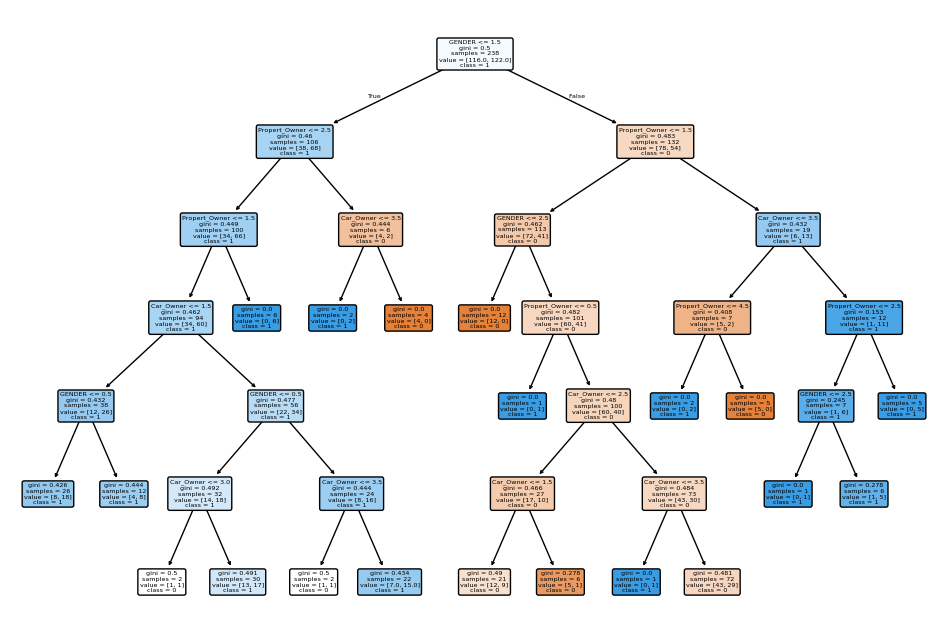

In [43]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt_model,
               feature_names=X.columns,
               class_names=['0','1'],
               filled=True,
               rounded=True)
plt.show()

#### 8. Evaluate the model (after tuning 2)

In [44]:
print ("Akurasi",accuracy_score(y_test,y_pred_new))

Akurasi 0.6372549019607843


In [45]:
print ("Confusuion Matrix:\n", confusion_matrix(y_test,y_pred_new))

Confusuion Matrix:
 [[36 18]
 [19 29]]


In [46]:
print ("Klasifikasi: \n", classification_report(y_test,y_pred_new))

Klasifikasi: 
               precision    recall  f1-score   support

           0       0.65      0.67      0.66        54
           1       0.62      0.60      0.61        48

    accuracy                           0.64       102
   macro avg       0.64      0.64      0.64       102
weighted avg       0.64      0.64      0.64       102



In [47]:
y_prob = dt_model.predict_proba (X_test_new)[:, 1]

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [49]:
roc_auc = auc (fpr, tpr)
print (f"AUC: {roc_auc}")

AUC: 0.6419753086419753


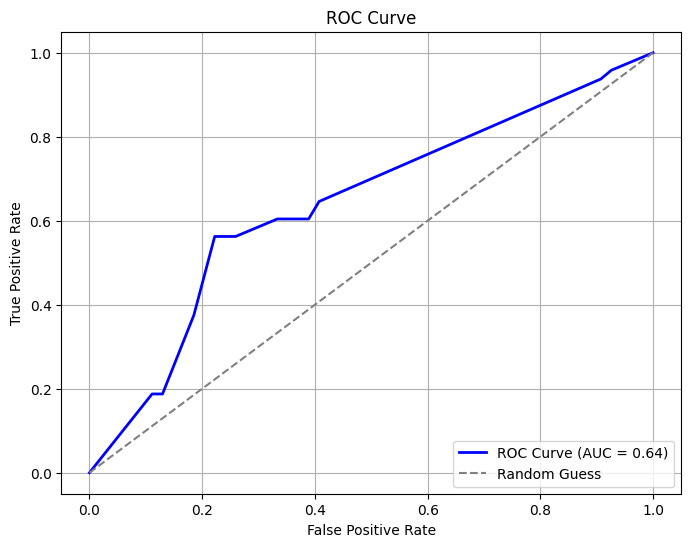

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], color='gray', linestyle='--', label = "Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc = "lower right")
plt.grid()
plt.show()

### **DEPLOYMENT**

In [52]:
!ngrok config add-authtoken 2pVvIgd9z3MehJo35WVlyzF5fF8_8eNM7NmwoDEaAX4jFh1h

Authtoken saved to configuration file: C:\Users\MOCH. IRDAN IQBAL Z\AppData\Local/ngrok/ngrok.yml


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1541 non-null   int64  
 1   GENDER          1541 non-null   int64  
 2   Car_Owner       1541 non-null   int64  
 3   Propert_Owner   1541 non-null   int64  
 4   CHILDREN        1541 non-null   int64  
 5   Annual_income   1541 non-null   float64
 6   Type_Income     1541 non-null   int64  
 7   EDUCATION       1541 non-null   int64  
 8   Marital_status  1541 non-null   int64  
 9   Housing_type    1541 non-null   int64  
 10  Family_Members  1541 non-null   int64  
 11  label           1541 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 144.6 KB


In [ ]:
import pandas as pd
import numpy as np
import pickle
import streamlit as st
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
pickle_in = open ('trained_model.pkl','rb')
classifier = pickle.load(pickle_in)
def prediction(GENDER, Car_Owner, Propert_Owner, CHILDREN, Annual_income, Type_Income, EDUCATION, Marital_status, Housing_type, Family_Members):
    input_data = np.array([GENDER, Car_Owner, Propert_Owner, CHILDREN, Annual_income, Type_Income, EDUCATION, Marital_status, Housing_type, Family_Members]).reshape(1, -1)

    pred = classifier.predict(input_data)
    proba = classifier.predict_proba(input_data)[:, 1]

    return pred, proba
def evaluate_model(X_test, y_test):
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    return accuracy, precision, recall, f1, roc_auc, y_pred, y_pred_proba
def plot_roc_curve(fpr, tpr, auc):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    st.pyplot(plt)
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    st.pyplot(plt)
def main():
    st.title("PREDICT")

    html_temp = """
    <div style="background-color:darkblue;padding:13px; border-radius:15px; margin-bottom:20px;">
    <h1 style="color:white;text-align:center;">Telco customer churn Classifier ML App</h1>
    </div>
    """
    st.markdown(html_temp, unsafe_allow_html=True)

    df = pd.read_csv('dataset.csv')

    majority = df[df["Churn Label"] == 0]
    minority = df[df["label"] == 1]
    majority_undersampled = majority.sample(n=len(minority), random_state=42)
    df = pd.concat([majority_undersampled, minority])

    X = df.drop(columns=['label','Ind_ID'])
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracy, precision, recall, f1, roc_auc, y_pred, y_pred_proba = evaluate_model(X_test, y_test)

    

    col1, col2, col3, col4 = st.columns(4)

    with col1:
        st.success(f"Accuracy: {accuracy:.2f}")

    with col2:
        st.info(f"Precision: {precision:.2f}")

    with col3:
        st.warning(f"Recall: {recall:.2f}")

    with col4:
        st.error(f"F1 Score: {f1:.2f}")

    plot_option = st.selectbox("Select the plot to display:", ["Select", "ROC AUC Curve", "Confusion Matrix"])

    if plot_option == "ROC AUC Curve":
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plot_roc_curve(fpr, tpr, roc_auc)

    elif plot_option == "Confusion Matrix":
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(cm)

    GENDER = st.text_input("Gender")
    Car_Owner = st.text_input("Car Owner")
    Propert_Owner = st.text_input("Property Owner")
    CHILDREN = st.text_input("Number of Children")
    Annual_income = st.text_input("Annual Income")
    Type_Income = st.text_input("Type of Income")
    EDUCATION = st.text_input("Education Level")
    Marital_status = st.text_input("Marital Status")
    Housing_type = st.text_input("Type of Housing")
    Family_Members = st.text_input("Number of Family Members")

    result = ""
    proba_result = ""

    if st.button("Predict"):
        result, proba = prediction(GENDER, Car_Owner, Propert_Owner, CHILDREN, Annual_income, Type_Income, EDUCATION, Marital_status, Housing_type, Family_Members)
        proba_result = f"{proba[0]:.2f}"
        result = 'Yes' if result[0] == 1 else 'No'

        st.success(f"Prediksi Churn: {result}")
        st.success(f"Probabilitas Churn: {proba_result}")

if __name__=='__main__':
    main()

2024-12-03 07:24:15.883 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 07:24:16.591 
  command:

    streamlit run C:\Users\MOCH. IRDAN IQBAL Z\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-03 07:24:16.592 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 07:24:16.593 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 07:24:16.594 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 07:24:16.624 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 07:24:16.624 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-03 07:

In [ ]:
try:
    # Memuat model yang sudah dilatih
    pickle_in = open('trained_model.pkl', 'rb')
    classifier = pickle.load(pickle_in)
except (FileNotFoundError, EOFError):
    st.warning("Model tidak ditemukan. Melatih ulang model...")
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    # Simpan model yang sudah dilatih
    with open('trained_model.pkl', 'wb') as file:
        pickle.dump(classifier, file)

In [ ]:
from pyngrok import ngrok
import threading
import os

def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit)
thread.start()

public_url = ngrok.connect(addr="8501")
print(f"Streamlit app is live at : {public_url}")

Streamlit app is live at : NgrokTunnel: "https://6200-103-233-100-234.ngrok-free.app" -> "http://localhost:8501"


t=2024-12-03T08:37:01+0700 lvl=warn msg="Stopping forwarder" name=http-8501-249caf83-3342-4b77-b733-abbb3609311f acceptErr="failed to accept connection: Listener closed"
t=2024-12-03T08:37:01+0700 lvl=warn msg="Error restarting forwarder" name=http-8501-249caf83-3342-4b77-b733-abbb3609311f err="failed to start tunnel: session closed"
